<a href="https://colab.research.google.com/github/arloporter/SMNA-Assignment-2/blob/main/graph_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install NVIDIA RAPIDS CUDA-enabled graph/dataframe libraries
*   Requries at least a tesla t4 (ideally p100)




In [ ]:
from IPython.display import HTML
from subprocess import getoutput
gpu_type = getoutput('nvidia-smi')
if 'K80' in gpu_type:
  gpu = 'K80'
elif 'T4' in gpu_type:
  gpu = 'T4'
elif 'P100' in gpu_type:
  gpu = 'P100'
display(HTML(f"<h2>{gpu}</h2>"))
print(gpu_type)

Sat Oct  1 08:14:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install pynvml
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py
!pip install --upgrade networkx
!sudo apt-get install graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.3 MB/s 
Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 300 (delta 74), reused 99 (delta 55), pack-reused 171
Receiving objects: 100% (300/300), 87.58 KiB | 7.30 MiB/s, done.
Resolving deltas: 100% (136/136), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla P100-PCIE-16GB!
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newe

In [ ]:
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,546 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,990 k

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 37.0.4
Uninstalling cryptography-37.0.4:
  Successfully uninstalled cryptography-37.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.1/427.1 kB 9.8 MB/s eta 0:00:00
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solvin

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cudf
import cugraph
import pandas as pd
import networkx as nx

FIXED = True
EXPORTED = True

if not FIXED:   
  stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'])
  stream_df['Weight'] = stream_df['Weight'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Retweet'] = stream_df['Retweet'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Reply'] = stream_df['Reply'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df['Quote'] = stream_df['Quote'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
  stream_df.to_csv('/content/drive/MyDrive/stream_big_edgelist.csv')
if not EXPORTED:
  stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'], dtype='string')
  stream_df = stream_df.drop(['Mention'], axis=1)
  net = nx.from_pandas_edgelist(stream_df, source="Source", target="Target", edge_attr='Weight')
  nx.write_gexf(net, "test.gexf")
if FIXED and EXPORTED:  
  graph = nx.read_gexf('/content/drive/MyDrive/test.gexf', )

# Centrality

In [ ]:
stream_df = pd.read_csv('/content/drive/MyDrive/stream_big_edgelist.csv', names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'], dtype='string')
stream_df = stream_df.drop(['Mention'], axis=1)
stream_df = stream_df.iloc[1: , :]
print(stream_df.head())
net = cugraph.from_pandas_edgelist(stream_df, source="Source", destination="Target", edge_attr='Weight')

          Source           Target Weight Retweet Reply Quote
0  antti_ellonen       EndGameWW3      1       1     0     0
1     EndGameWW3     CarlaBabbVOA      1       1     0     0
2     EndGameWW3     laraseligman      1       1     0     0
3     EndGameWW3  PentagonPresSec      1       0     0     0
4     EndGameWW3        Liveuamap      1       1     0     0


In [ ]:
CALCULATED = False
if not CALCULATED:
  bc = cugraph.betweenness_centrality(net, 100000)
  print(bc)
  bc.to_csv('/content/drive/MyDrive/betweenness_centrality.csv')
elif CALCULATED:
  bc = pd.read_csv('/content/drive/MyDrive/betweenness_centrality.csv')

# Community detection

In [ ]:
CALCULATED = True
if not CALCULATED:
  spmmc = cugraph.spectralModularityMaximizationClustering(net, 5)
  spmmc.to_csv('/content/drive/MyDrive/SPMMC5.csv')
  spmmc500 = cugraph.spectralModularityMaximizationClustering(net, 500)
  spmmc500.to_csv('/content/drive/MyDrive/SPMMC500.csv')
elif CALCULATED:
  spmmc = cudf.read_csv('/content/drive/MyDrive/SPMMC.csv')
  spmmc500 = cudf.read_csv('/content/drive/MyDrive/SPMMC500.csv')
#spmmc = spmmc.loc[:, ~spmmc.columns.str.contains('^Unnamed')]
print(spmmc.head())

   Unnamed: 0  cluster           vertex
0           0        0      SuzietheLip
1           1        0        4USIDream
2           2        0     maggiemae362
3           3        0       AussieYazz
4           4        0  beukes_clifford


In [ ]:
if not CALCULATED:
  parts = cugraph.ecg(net)
  parts.to_csv('/content/drive/MyDrive/ECG.csv')
elif CALCULATED:
  parts = cudf.read_csv('/content/drive/MyDrive/ECG.csv')
#parts = parts.loc[:, ~parts.columns.str.contains('^Unnamed')]
print(parts.head())

   Unnamed: 0  partition           vertex
0           0        463      SuzietheLip
1           1        189        4USIDream
2           2         89     maggiemae362
3           3         55       AussieYazz
4           4        317  beukes_clifford


In [ ]:
if not CALCULATED:
  sbcc = cugraph.spectralBalancedCutClustering(net, 10)
  sbcc.to_csv('/content/drive/MyDrive/SBCC.csv')
  sbcc100 = cugraph.spectralBalancedCutClustering(net, 100)
  sbcc100.to_csv('/content/drive/MyDrive/SBCC100.csv')
elif CALCULATED:
  sbcc = cudf.read_csv('/content/drive/MyDrive/SBCC.csv')
  sbcc100 = cudf.read_csv('/content/drive/MyDrive/SBCC100.csv')

#sbcc = sbcc.loc[:, ~sbcc.columns.str.contains('^Unnamed')]
print(sbcc.head())

   Unnamed: 0  cluster           vertex
0           0        4      SuzietheLip
1           1        6        4USIDream
2           2        6     maggiemae362
3           3        6       AussieYazz
4           4        4  beukes_clifford


# Seperate tweets from different communities into their own dataframes

In [ ]:
tweets_df = cudf.read_csv('/content/drive/MyDrive/ukraine_stream_big.csv')
#!sudo apt install python3-cffi
#!pip install --upgrade cffi==1.15.1

In [ ]:
import time
from IPython.display import clear_output

for community in spmmc500['cluster'].to_pandas().unique():
  community_list = []
  community_df = spmmc500[spmmc500['cluster'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  print(community_total.head())
  community_total.to_csv(f'/content/drive/MyDrive/communities_SPMMC/community{community}-500.csv')

                         id      conversation_id  \
333331  1573058423343779851  1573058423343779851   
342062  1573059670687846402  1573059670687846402   
344713  1573060041158139909  1572207904500891649   
14204   1573016020599672836  1573001768354840576   
292061  1573052698135597059  1572972804189962242   

       referenced_tweets.replied_to.id referenced_tweets.retweeted.id  \
333331                            <NA>                1.572985069e+18   
342062                            <NA>                1.572207905e+18   
344713                 1.572207905e+18                           <NA>   
14204                  1.573005703e+18                           <NA>   
292061                  1.57300788e+18                           <NA>   

       referenced_tweets.quoted.id            author_id in_reply_to_user_id  \
333331                        <NA>           3413287791                <NA>   
342062                        <NA>           3413287791                <NA>   
344713     

In [ ]:
for community in parts['partition'].to_pandas().unique():
  community_list = []
  community_df = parts[parts['partition'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  community_total.to_csv(f'/content/drive/MyDrive/communities_ECG/community{community}csv')

In [ ]:
for community in sbcc100['cluster'].to_pandas().unique():
  community_list = []
  community_df = sbcc100[sbcc100['cluster'] == community]
  for index in range(community_df.shape[0]):
    row = community_df.iloc[index]
    cluster, username = row['cluster'].iloc[0], row['vertex'].iloc[0]
    username_df = tweets_df[tweets_df['author.username'] == username]
    community_list.append(username_df)

  community_total = cudf.concat(community_list)
  print(community_total.head())
  community_total.to_csv(f'/content/drive/MyDrive/communities_SBCC/community{community}-100.csv')

# Iterate through communities, check 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23,41,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


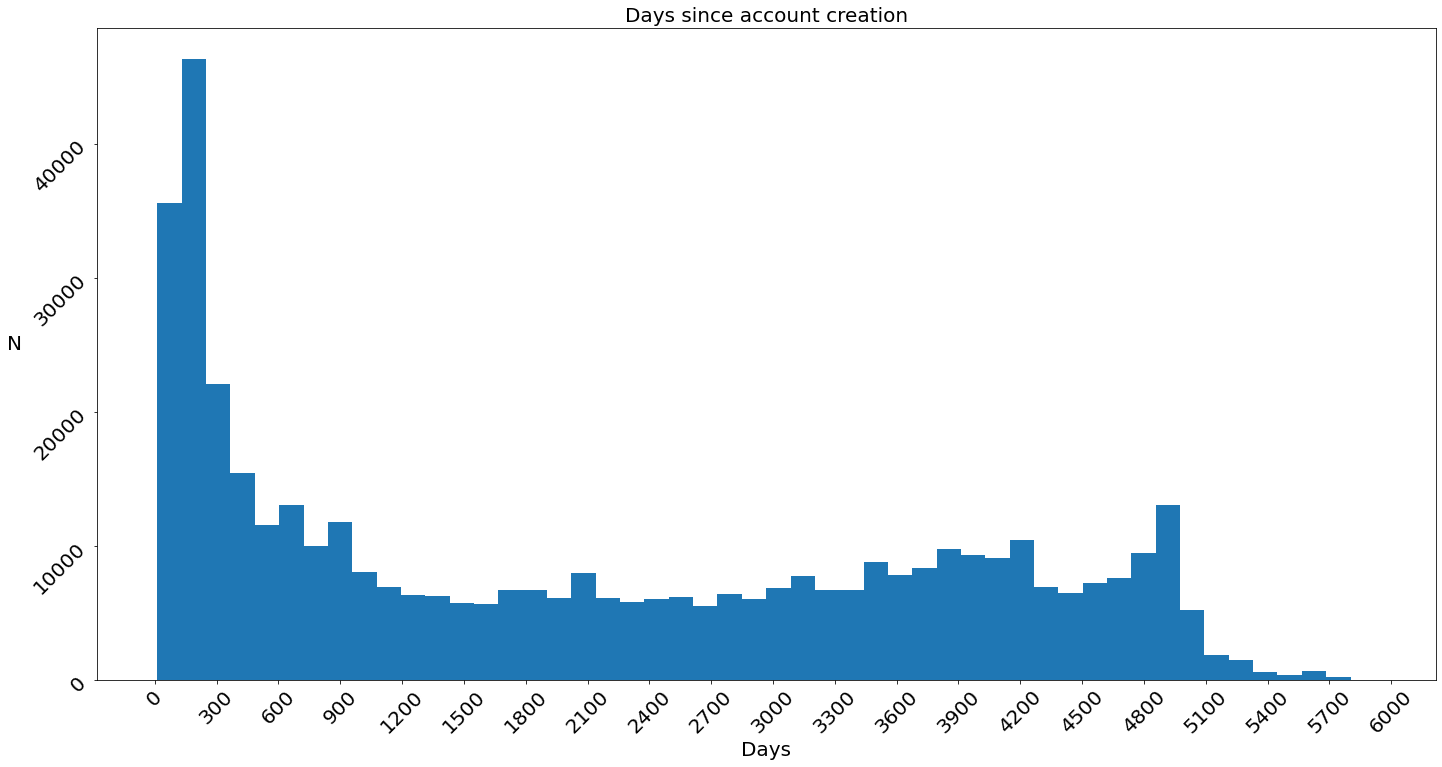

None


In [16]:
#!pip install deep-translator
from deep_translator import GoogleTranslator
import pandas as pd, matplotlib.pyplot as plt
import os, re, time, nltk, pprint

def clean__translate_tweet(row):
  row['translated'] = GoogleTranslator(source='auto', target='en').translate(text=row['text'])
  time.sleep(0.3)
  row['translated'] = re.sub("@[A-Za-z0-9]+", " ", row['translated'])
  row['translated'] = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", row['translated'])
  row['translated'] = re.sub("[^A-Za-z0-9]", " ", row['translated'])
  return row

def cleanTimestamps(time):
  if not isinstance(time, str):
    return
  time = time[:19]
  time = list(time)
  time[10] = " "
  time = "".join(time)
  return time

def ms_since_creation(date):
  if not isinstance(date, str):
    return
  current = time.time()*1000
  past = time.mktime(time.strptime(date, "%Y-%m-%d %H:%M:%S"))*1000
  time_since = current - past
  days_since = int(time_since/(1000*60*60*24))
  return days_since

def plot_account_creation(dataframe):
  dataframe['author.created_at'] = dataframe['author.created_at'].map(lambda x: cleanTimestamps(x))
  dataframe['days_since_creation'] = dataframe['author.created_at'].map(lambda x: ms_since_creation(x))
  fig, axes = plt.subplots(1, 1, figsize=(24, 12))

  axes.hist(dataframe['days_since_creation'], bins = 50)
  for tick in axes.xaxis.get_major_ticks():
      tick.label.set_fontsize(20) 
      tick.label.set_rotation(45)
  for tick in axes.yaxis.get_major_ticks():
      tick.label.set_fontsize(20) 
      tick.label.set_rotation(45)

  axes.set_title('Days since account creation', fontsize=20)
  axes.set_xlabel("Days", fontsize=20)
  axes.set_ylabel("N", rotation=0, fontsize=20, labelpad=16)

  plt.xticks(fontsize=20, rotation=45)
  plt.yticks(fontsize=20)

  xloc = plt.MaxNLocator(23)
  axes.xaxis.set_major_locator(xloc)
  print(plt.show())

def analyse_community(dataframe, path):
  try:
    print(dataframe['translated'].shape)
  except KeyError:
    dataframe = dataframe.apply(clean__translate_tweet, axis = 1)
    dataframe.to_csv(path)
    
  print(dataframe['author.location'].value_counts(5))
  plot_account_creation(dataframe)

  all_text = " ".join([i for i in dataframe['translated']])
  tokens = nltk.wordpunct_tokenize(all_text)
  text = nltk.Text(tokens)
  concordances = text.concordance("mobilization")

  quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(text)
  pprint.pprint(quadgrams.ngram_fd.tabulate(20))

tweets_df = pd.read_csv('/content/drive/MyDrive/ukraine_stream_big.csv')
#analyse_community(tweets_df, '/content/drive/MyDrive/ukraine_stream_big.csv')
plot_account_creation(tweets_df)


# Save previous analyses to text file

In [ ]:
path = '/content/drive/MyDrive/communities_ECG/'
for file in os.listdir(path):
  dataframe = pd.read_csv(path + file)
  analyse_community(dataframe, f'{path}{file}')




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,22,32,34,35,36,42,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
